## Introduction
In this report, we will perform time series analysis on daily household consuption of energy

## Dataset Columns

### Features
#### date
Date in format dd/mm/yyyy
#### time
time in format hh:mm:ss
#### global_reactive_power
household global minute-averaged reactive power (in kilowatt)
#### voltage
minute-averaged voltage (in volt)
#### global_intensity
household global minute-averaged current intensity (in ampere)
#### sub_metering_1
energy sub-metering No. 1 (in watt-hour of active energy). It corresponds to the kitchen, containing mainly a dishwasher, an oven and a microwave (hot plates are not electric but gas powered).
#### sub_metering_2
energy sub-metering No. 2 (in watt-hour of active energy). It corresponds to the laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light.
#### sub_metering_3
energy sub-metering No. 3 (in watt-hour of active energy). It corresponds to an electric water-heater and an air-conditioner.

### Target Variable
#### global_active_power
household global minute-averaged active power (in kilowatt)

[Dataset Description](http://archive.ics.uci.edu/ml/datasets/Individual+household+electric+power+consumption)

## Import And Clean Data

In [1]:
# import requrired modules
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

import warnings
warnings.filterwarnings('ignore')

# constants
PATH = "C:/Users/shagu/Documents/CST_T04/COMP_4949_BIG_DATA/data_sets/"
DATA_FILE = "household_power_consumption.txt"

In [2]:
# dataset head
# NAN and "?" values are strings, we will chnage them to pandas NAN
df = pd.read_csv(
        PATH + DATA_FILE, sep=';', 
        low_memory=False,
        na_values=['nan','?']
)
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    float64
 3   Global_reactive_power  float64
 4   Voltage                float64
 5   Global_intensity       float64
 6   Sub_metering_1         float64
 7   Sub_metering_2         float64
 8   Sub_metering_3         float64
dtypes: float64(7), object(2)
memory usage: 142.5+ MB


#### Merge Date, Time Column to one

In [4]:
# We will merge date and time to one column
def set_date_time_index(df, set_index=True):
    df["Date"] = pd.to_datetime(df["Date"])
    df["Time"] = pd.to_timedelta(df["Time"])

    df["DateTime"] = df["Date"] + df["Time"]
    
    if set_index:
        df = df.set_index("DateTime")
    
set_date_time_index(df)

#### Replace null values with mean

In [5]:
# Fill null values with mean
df = df.fillna(df.mean())

## Target Variable Statistics

In [6]:
# Statistics - "average global active power date"
# Max 
print("#### MAX GLOBAL ACTIVE POWER ####")
print(
    df.loc[
        df["Global_active_power"] == df["Global_active_power"].max()
    ][["DateTime", "Global_active_power"]]
)

# Min 
print("\n\n#### MIN GLOBAL ACTIVE POWER ####")
print(
    df.loc[
        df["Global_active_power"] == df["Global_active_power"].min()
    ][["DateTime", "Global_active_power"]]
)

# Mean 
print("\n\n#### MEAN GLOBAL ACTIVE POWER ####")
print(
    df["Global_active_power"].mean()
)

# Standard Deviation 
print("\n\n#### STANDARD DEVIATION GLOBAL ACTIVE POWER ####")
print(
    df["Global_active_power"].std()
)

#### MAX GLOBAL ACTIVE POWER ####
                   DateTime  Global_active_power
1150545 2009-02-22 17:09:00               11.122


#### MIN GLOBAL ACTIVE POWER ####
                  DateTime  Global_active_power
871322 2008-12-08 19:26:00                0.076
894442 2008-08-28 20:46:00                0.076
894443 2008-08-28 20:47:00                0.076
894444 2008-08-28 20:48:00                0.076
894445 2008-08-28 20:49:00                0.076
894446 2008-08-28 20:50:00                0.076
894447 2008-08-28 20:51:00                0.076
894448 2008-08-28 20:52:00                0.076
894458 2008-08-28 21:02:00                0.076


#### MEAN GLOBAL ACTIVE POWER ####
1.0916150365016037


#### STANDARD DEVIATION GLOBAL ACTIVE POWER ####
1.0506554805708126


### Global Active Power Resampled Over Day (Sum, Mean, Std)

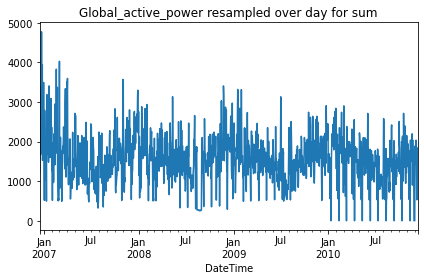

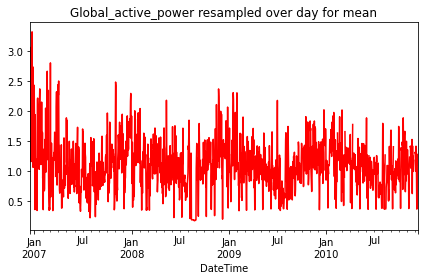

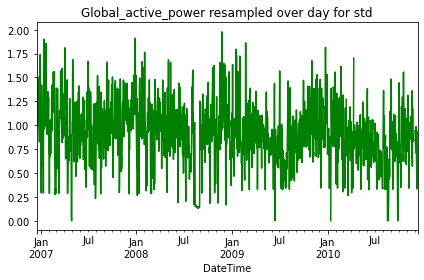

In [7]:
set_date_time_index(df)
df = df.set_index("DateTime")

df.Global_active_power.resample('D').sum().plot(title='Global_active_power resampled over day for sum') 

plt.tight_layout()
plt.show()   

df.Global_active_power.resample('D').mean().plot(title='Global_active_power resampled over day for mean', color='red') 
plt.tight_layout()
plt.show()

df.Global_active_power.resample('D').std().plot(title='Global_active_power resampled over day for std', color='green') 
plt.tight_layout()
plt.show()

### Global Active Power Resample Over Quarter

We can see that when we resaple over large time, like quarterly, it will reduce the predictity of our model. However, it will cost us highly if we go with resampling hourly, or daily



<AxesSubplot:xlabel='DateTime'>

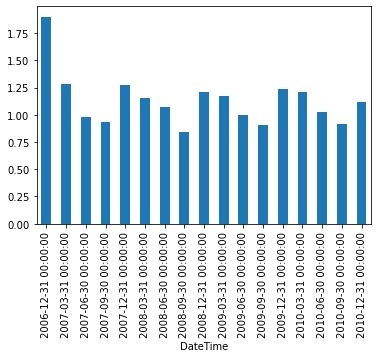

In [8]:
df["Global_active_power"].resample("Q").mean().plot(kind="bar")

## Feature Visualization

### Correlation Among Features


we can see that sub metering 1, 2, 3 has positive correlation 
with global active power consumption

however, voltage is less correlated with global active power

Global intensity seem to have highest positive correlation with our target variable

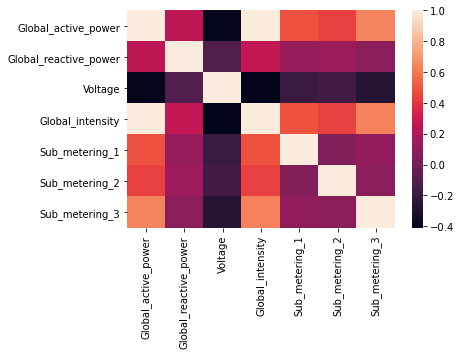

In [9]:
# Correlation among columns
sns.heatmap(df.corr())
plt.show()


### Global Reactive Power Resampled Over Day (Sum, Mean, Std)

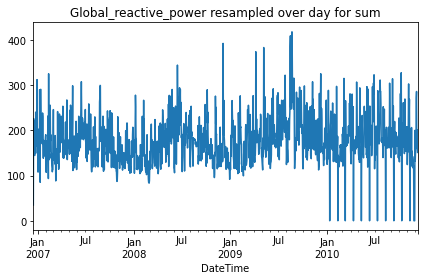

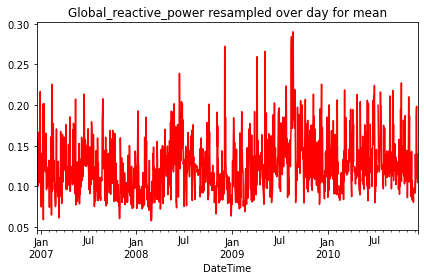

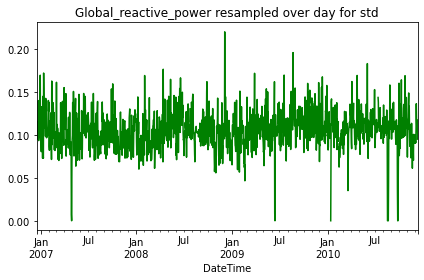

In [10]:
df.Global_reactive_power.resample('D').sum().plot(title='Global_reactive_power resampled over day for sum') 

plt.tight_layout()
plt.show()   

df.Global_reactive_power.resample('D').mean().plot(title='Global_reactive_power resampled over day for mean', color='red') 
plt.tight_layout()
plt.show()

df.Global_reactive_power.resample('D').std().plot(title='Global_reactive_power resampled over day for std', color='green') 
plt.tight_layout()
plt.show()

### Global Intensity

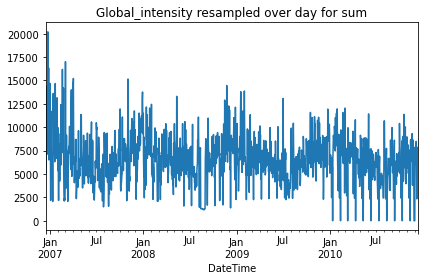

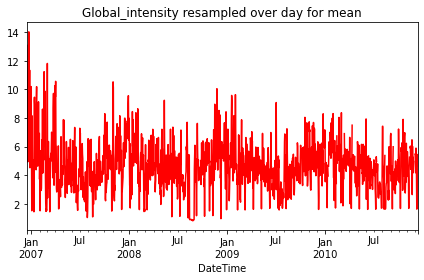

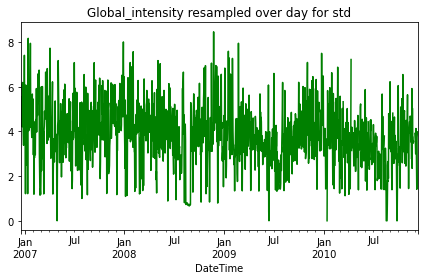

In [11]:
df.Global_intensity.resample('D').sum().plot(title='Global_intensity resampled over day for sum') 

plt.tight_layout()
plt.show()   

df.Global_intensity.resample('D').mean().plot(title='Global_intensity resampled over day for mean', color='red') 
plt.tight_layout()
plt.show()

df.Global_intensity.resample('D').std().plot(title='Global_intensity resampled over day for std', color='green') 
plt.tight_layout()
plt.show()

### Submeters

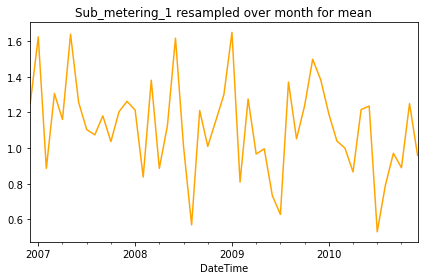

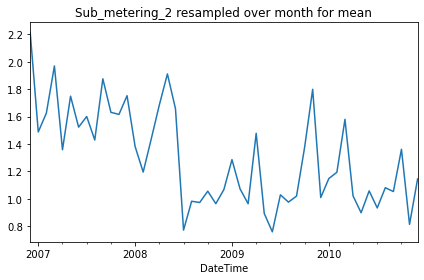

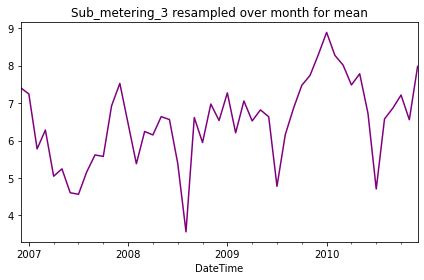

In [12]:
# Plot the responses for different events and regions
df.Sub_metering_1.resample(
    'M'
).mean().plot(
    title='Sub_metering_1 resampled over month for mean', color="orange"
) 

plt.tight_layout()
plt.show()   

df.Sub_metering_2.resample('M').mean().plot(title='Sub_metering_2 resampled over month for mean') 

plt.tight_layout()
plt.show()  

df.Sub_metering_3.resample(
    'M'
).mean().plot(
    title='Sub_metering_3 resampled over month for mean', color="purple"
) 

plt.tight_layout()
plt.show()  

#### We can see that it is very costly to pricess original data over days, or weeks. So, we might need to stick to processing data monthly, even though it will affect predictiity of our mode as even creating graphs with days or monthly resampling takes a long time

### Seasonal Decomposition

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose

set_date_time_index(df)

core_columns =  [
    'DateTime', 'Global_active_power', 
    'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', "Sub_metering_3" 
]

for column in core_columns:
    decomp = seasonal_decompose(df[column], period=12, model='additive', extrapolate_trend='freq')
    df[f"{column}_trend"] = decomp.trend
    df[f"{column}_seasonal"] = decomp.seasonal

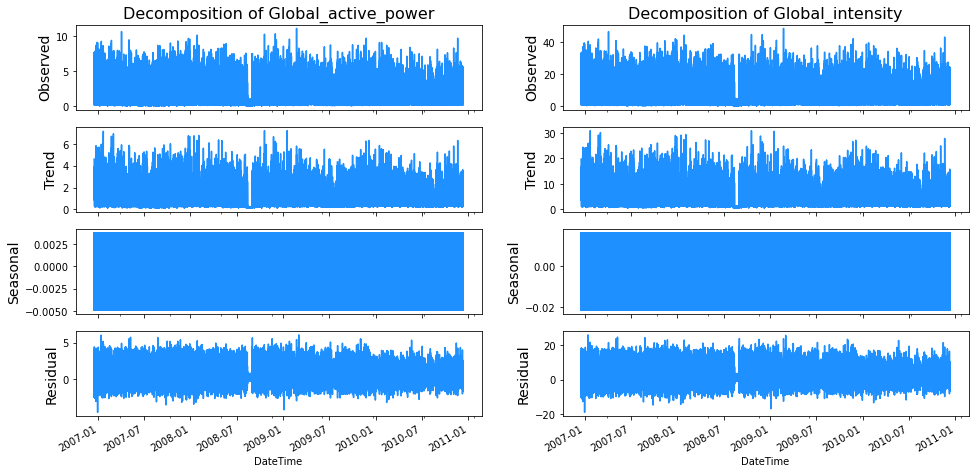

In [14]:
fig, ax = plt.subplots(ncols=2, nrows=4, sharex=True, figsize=(16,8))

for i, column in enumerate(['Global_active_power', 'Global_intensity']):
    
    res = seasonal_decompose(df[column], freq=52, model='additive', extrapolate_trend='freq')

    ax[0,i].set_title('Decomposition of {}'.format(column), fontsize=16)
    res.observed.plot(ax=ax[0,i], legend=False, color='dodgerblue')
    ax[0,i].set_ylabel('Observed', fontsize=14)

    res.trend.plot(ax=ax[1,i], legend=False, color='dodgerblue')
    ax[1,i].set_ylabel('Trend', fontsize=14)

    res.seasonal.plot(ax=ax[2,i], legend=False, color='dodgerblue')
    ax[2,i].set_ylabel('Seasonal', fontsize=14)
    
    res.resid.plot(ax=ax[3,i], legend=False, color='dodgerblue')
    ax[3,i].set_ylabel('Residual', fontsize=14)

plt.show()

## Model Development

#### Process Data

In [15]:
from statsmodels.tsa.statespace.tools import diff

def process_data(df):
    set_date_time_index(df, set_index=False)
    df = df.drop(["Voltage", "Date", "Time"], axis = 1)
    df["d1"] = diff(df["Global_active_power"], k_diff=1)
    df["d2"] = diff(df["Global_active_power"], k_diff=2)
    return df

df = process_data(df)

#### Create Time Shift Columns

In [16]:
NUM_SHIFTS = 5

def create_time_shift_columns(df, target_col, n_shifts):
    df = df.copy(True)
    for i in range(1, n_shifts+1):
        new_col = f"{target_col}_t-{i}"
        df[new_col] = df[target_col].shift(periods=i)
        df = df.dropna()
    return df

df = create_time_shift_columns(df, "Global_active_power", NUM_SHIFTS)

#### Train test split

In [76]:
from statsmodels import api as sm

TEST_DAYS = 30
TEST_SPLIT = 15 # requirement

FEATURES = [
    "Global_active_power_t-1", "Global_active_power_t-2", 
    "Global_active_power_t-3", "Global_active_power_t-4",
    "Global_active_power_t-5"
]

TARGET = "Global_active_power"

x = df[FEATURES]
x = sm.add_constant(df)
y = df[[TARGET]]


TRAIN_LEN = len(df) - TEST_DAYS
x_train, x_temp = x[FEATURES][:TRAIN_LEN], x[FEATURES][TRAIN_LEN:]
y_train, y_temp = y[TARGET][:TRAIN_LEN], y[TARGET][TRAIN_LEN:]
x_test, x_val = x_temp[:TEST_SPLIT], x_temp[TEST_SPLIT:]
y_test, y_val = y_temp[:TEST_SPLIT], y_temp[TEST_SPLIT:]
t_validation = x[FEATURES][TEST_SPLIT + TRAIN_LEN:]

### Model 1 - OLS

In [18]:
from sklearn.preprocessing import RobustScaler

# Scale data

x_scaler, y_scaler = RobustScaler(), RobustScaler()
x_scaled = x_scaler.fit_transform(x_train)
y_scaled = y_scaler.fit_transform(y_train.values.reshape(-1, 1))
x_test_scaled = x_scaler.transform(x_test)

ols_model = sm.OLS(y_scaled, x_scaled).fit()
print(ols_model.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.948
Model:                            OLS   Adj. R-squared (uncentered):              0.948
Method:                 Least Squares   F-statistic:                          7.605e+06
Date:                Mon, 07 Mar 2022   Prob (F-statistic):                        0.00
Time:                        07:29:07   Log-Likelihood:                      2.3801e+05
No. Observations:             2075213   AIC:                                 -4.760e+05
Df Residuals:                 2075208   BIC:                                 -4.759e+05
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

##### Model Prediction

In [58]:
df_predictions, df_validation = pd.DataFrame(), pd.DataFrame()
ols_predictions = ols_model.predict(x_test_scaled)
df_predictions['OLS'] = ols_predictions
scaled_validation = ols_model.predict(x_scaler.transform(x_val))
df_validation['OLS'] = scaled_validation
ols_validation = y_scaler.inverse_transform(scaled_validation.reshape(-1, 1))

### Model 2 - ARIMA

In [ ]:
!pip install pmdarima

In [36]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

arima_model = pm.auto_arima(y_train, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(arima_model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=371480.770, Time=344.79 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=7613496.746, Time=30.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=376372.168, Time=223.28 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=5204281.315, Time=195.57 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=351960.515, Time=1066.67 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=3877568.642, Time=380.94 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=358906.542, Time=373.68 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=6094172.552, Time=31.61 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0] intercept
Total fit time: 2701.371 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:              2075213
Model:               SARIMAX(1, 0, 1)   Log Likelihood             -175976.258
Date:                Mon, 07 Mar 2022   AIC                         351960.51

##### Best model:   ARIMA(1,0,1)(0,0,0)[0]       

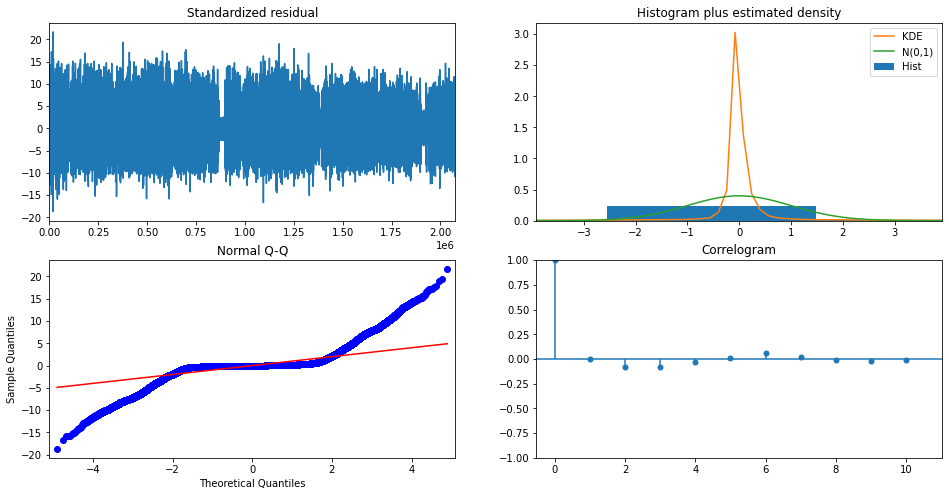

In [39]:
arima_model.plot_diagnostics(figsize=(16,8))
plt.show()

##### Residual Errors
Even though we can't say residual errors variance is uniform, the difference is quite small. The residual errors seem to have variance betweeen (0, 2)

##### Density Plot
Normal distribution (almost) around mean 0

##### Normal Q-Q
Our distribution isn't highly skewed, the dots are on the line

##### ACF Plot
Our residual errors are not auto corrected

#### Predictions

In [59]:
arima_predictions = arima_model.predict(n_periods=15)
df_predictions['ARIMA'] = arima_predictions

arima_validation = arima_model.predict(n_periods=15)
df_validation['ARIMA'] = arima_validation

### Stacked Model

In [60]:
from sklearn.linear_model import LinearRegression

stacked_model = LinearRegression()
stacked_model.fit(df_predictions, y_test)
stacked_predictions = stacked_model.predict(df_validation)

## Model Evaluation

In [63]:
from sklearn import metrics

def evaluate_model(y_test, predictions, model, model_name):
    print(f"Model: {model_name}")
    print("\n\n")
    print(f"RMSE: {metrics.mean_squared_error(y_test, predictions, squared=False)}\n")
    print(f"MSE: {metrics.mean_squared_error(y_test, predictions)}\n")
    print(f"MAE: {metrics.mean_squared_error(y_test, predictions)}\n")
    print(f"MAPE: {metrics.mean_absolute_percentage_error(y_test, predictions)}\n\n")

In [64]:
evaluate_model(y_test, ols_predictions, ols_model, "MODEL 1: OLS")

Model: MODEL 1: OLS



RMSE: 0.6915102568818848

MSE: 0.4781864353728503

MAE: 0.4781864353728503

MAPE: 0.7135722231743276




In [65]:
evaluate_model(y_test, arima_predictions, arima_model, "MODEL 2: ARIMA")

Model: MODEL 2: ARIMA



RMSE: 0.051141453825016794

MSE: 0.0026154482993363246

MAE: 0.0026154482993363246

MAPE: 0.04192460230529593




In [66]:
evaluate_model(y_test, stacked_predictions, stacked_model, "MODEL 3: STACKED")

Model: MODEL 3: STACKED



RMSE: 0.06447638399615216

MSE: 0.004157204093219267

MAE: 0.004157204093219267

MAPE: 0.04526810561802632




We can see that RMSE for our arima model is lowest, so that's our best model (thought the values are quire close)

## Future Prediction 

We will be using most current values to predict t+1. Model prediction for household global acitve energy consumption in time t+1 is as follows:

In [79]:
df_tPlusOne = pd.DataFrame()
df_tPlusOne['OLS'] = ols_model.predict(x[FEATURES][len(x) - 1: len(x)])
df_tPlusOne['ARIMA'] = arima_model.predict(n_periods=31)[30]
print(stacked_model.predict(df_tPlusOne))

[1.64274527]
